In [100]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
import keras.applications
from keras import backend as K
from tensorflow.keras.utils import plot_model
import keras.utils
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

Much more complex and regressive problem related to predicting solar flares
"This dataset was created by Roman Bolzern and Michael Aerni from the Institute for Data Science, FHNW, Switzerland. We owe our thanks to the SDO satellite mission, and to JSOC Stanford for providing the raw data."

Setting up files and checking tables/csv's

In [48]:
Main_Path = Path('SDOBenchmark_example/training')

In [49]:
Main_Train_CSV = list(Main_Path.glob(r"**/*.csv"))

In [50]:
print(len(Main_Train_CSV))

2


In [51]:
Train_CSV = Main_Train_CSV[0]

In [52]:
print(Train_CSV)

SDOBenchmark_example\training\meta_data.csv


In [53]:
Reading_CSV = pd.read_csv(Train_CSV)

In [54]:
print(Reading_CSV.columns)

Index(['id', 'start', 'end', 'peak_flux'], dtype='object')


In [55]:
print(len(Reading_CSV))

417


In [56]:
print(Reading_CSV.head(-1))

                              id                          start  \
0    11389_2012_01_01_19_06_00_0  2012-01-01 07:06:00.000000000   
1    11390_2012_01_03_02_22_01_1  2012-01-03 14:22:00.000000000   
2    11392_2012_01_06_00_09_01_0  2012-01-05 12:09:01.000000000   
3    11388_2012_01_07_02_27_01_0  2012-01-06 14:27:01.000000000   
4    11394_2012_01_07_12_00_00_0  2012-01-07 00:00:00.000000000   
..                           ...                            ...   
411  12676_2017_09_03_12_00_00_5  2017-09-05 12:00:00.000000000   
412  12674_2017_09_05_02_22_00_5  2017-09-08 20:01:07.753754283   
413  12683_2017_09_28_01_01_00_3  2017-09-30 13:19:00.999999999   
414  12682_2017_10_05_02_49_59_0  2017-10-04 14:49:59.000000000   
415  12683_2017_10_06_16_35_59_0  2017-10-06 04:35:59.000000000   

                               end     peak_flux  
0    2012-01-01 19:06:00.000000000  1.882353e-06  
1    2012-01-04 02:22:00.000000000  7.529412e-07  
2    2012-01-06 00:09:01.000000000  3.0588

In [57]:
print(Reading_CSV.isnull().sum())

id           0
start        0
end          0
peak_flux    0
dtype: int64


In [58]:
print(Reading_CSV["peak_flux"][0])

1.8823529411764705e-06


In [59]:
print(Reading_CSV["start"][414])

2017-10-04 14:49:59.000000000


In [60]:
print(Reading_CSV["start"][414][0:10])

2017-10-04


Transform date and time to a useable form

In [61]:
print(type(Reading_CSV["start"][414][0:10]))

<class 'str'>


In [62]:
Test_Date_Transform = Reading_CSV["start"][414][0:10].replace("-","")

In [63]:
print(Test_Date_Transform)

20171004


In [64]:
Test_Date_Array = np.array(int(Test_Date_Transform))

In [65]:
print(type(Test_Date_Array))

<class 'numpy.ndarray'>


Begin Data processing

In [66]:
JPG_Path = list(Main_Path.glob(r"**/*.jpg"))

In [67]:
Sorted_JPG_Path = sorted(JPG_Path)

In [68]:
Reading_CSV["New_ID"] = Sorted_JPG_Path[40:457]

In [69]:
print(Reading_CSV.head(-1))

                              id                          start  \
0    11389_2012_01_01_19_06_00_0  2012-01-01 07:06:00.000000000   
1    11390_2012_01_03_02_22_01_1  2012-01-03 14:22:00.000000000   
2    11392_2012_01_06_00_09_01_0  2012-01-05 12:09:01.000000000   
3    11388_2012_01_07_02_27_01_0  2012-01-06 14:27:01.000000000   
4    11394_2012_01_07_12_00_00_0  2012-01-07 00:00:00.000000000   
..                           ...                            ...   
411  12676_2017_09_03_12_00_00_5  2017-09-05 12:00:00.000000000   
412  12674_2017_09_05_02_22_00_5  2017-09-08 20:01:07.753754283   
413  12683_2017_09_28_01_01_00_3  2017-09-30 13:19:00.999999999   
414  12682_2017_10_05_02_49_59_0  2017-10-04 14:49:59.000000000   
415  12683_2017_10_06_16_35_59_0  2017-10-06 04:35:59.000000000   

                               end     peak_flux  \
0    2012-01-01 19:06:00.000000000  1.882353e-06   
1    2012-01-04 02:22:00.000000000  7.529412e-07   
2    2012-01-06 00:09:01.000000000  3.0

In [70]:
print(Reading_CSV["New_ID"][0])
print("---"*10)
print(Reading_CSV["id"][0])

SDOBenchmark_example\training\11388\2012_01_07_02_27_01_0\2012-01-07T005701__131.jpg
------------------------------
11389_2012_01_01_19_06_00_0


Building New data

In [71]:
New_Start = []
New_End = []
New_Path = []

for x_start, x_end, x_path in zip(Reading_CSV.start.values,Reading_CSV.end.values,Reading_CSV.New_ID.values):

    x_start = x_start[0:10]
    x_start = x_start.replace("-","")
    x_start = np.array(x_start,dtype="float32")

    x_end = x_end[0:10]
    x_end = x_end.replace("-","")
    x_end = np.array(x_end,dtype="float32")

    New_Start.append(x_start)
    New_End.append(x_end)
    New_Path.append(x_path)

In [72]:
print("LEN START: ", len(New_Start))
print("LEN END: ", len(New_End))
print("LEN PATH: ", len(New_Path))

LEN START:  417
LEN END:  417
LEN PATH:  417


In [73]:
print(New_Start[0])
print("--"*10)
print(New_End[0])
print("--"*10)
print(New_Path[0])

20120100.0
--------------------
20120100.0
--------------------
SDOBenchmark_example\training\11388\2012_01_07_02_27_01_0\2012-01-07T005701__131.jpg


Dataframe

In [74]:
Start_Series = pd.Series(New_Start,name="START").astype(np.float32)
End_Series = pd.Series(New_End,name="END").astype(np.float32)
Path_Series = pd.Series(New_Path,name="PATH").astype(str)

In [75]:
Main_Data = pd.concat([Path_Series,Start_Series,End_Series],axis=1)

In [76]:
print(Main_Data.head(-1))

                                                  PATH       START         END
0    SDOBenchmark_example\training\11388\2012_01_07...  20120100.0  20120100.0
1    SDOBenchmark_example\training\11388\2012_01_07...  20120104.0  20120104.0
2    SDOBenchmark_example\training\11388\2012_01_07...  20120104.0  20120106.0
3    SDOBenchmark_example\training\11388\2012_01_07...  20120106.0  20120108.0
4    SDOBenchmark_example\training\11388\2012_01_07...  20120108.0  20120108.0
..                                                 ...         ...         ...
411  SDOBenchmark_example\training\11391\2012_01_09...  20170904.0  20170906.0
412  SDOBenchmark_example\training\11391\2012_01_09...  20170908.0  20170908.0
413  SDOBenchmark_example\training\11391\2012_01_09...  20170930.0  20171000.0
414  SDOBenchmark_example\training\11391\2012_01_09...  20171004.0  20171004.0
415  SDOBenchmark_example\training\11391\2012_01_09...  20171006.0  20171006.0

[416 rows x 3 columns]


Vision
Single

In [77]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][33]), cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.imshow(Example_IMG)

#plt.show()

Multi

In [78]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):

    Reading_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][indexing]),cv2.COLOR_BGR2RGB)

    operations.set_xlabel(Reading_IMG.shape)
    operations.set_ylabel(Reading_IMG.size)
    operations.imshow(Reading_IMG)

plt.tight_layout()
#plt.show()

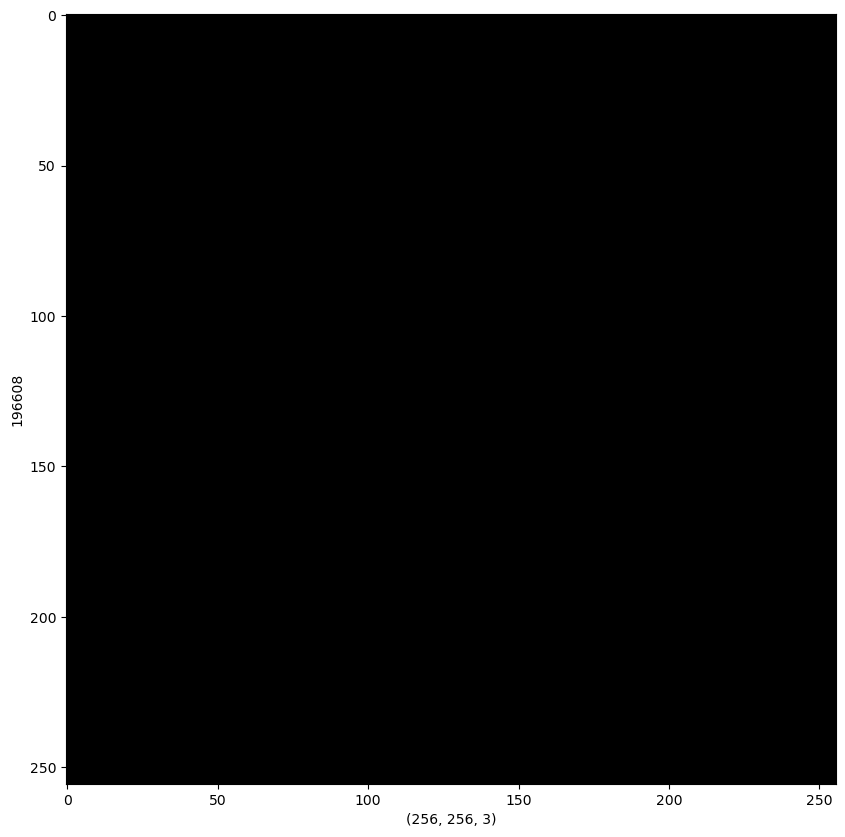

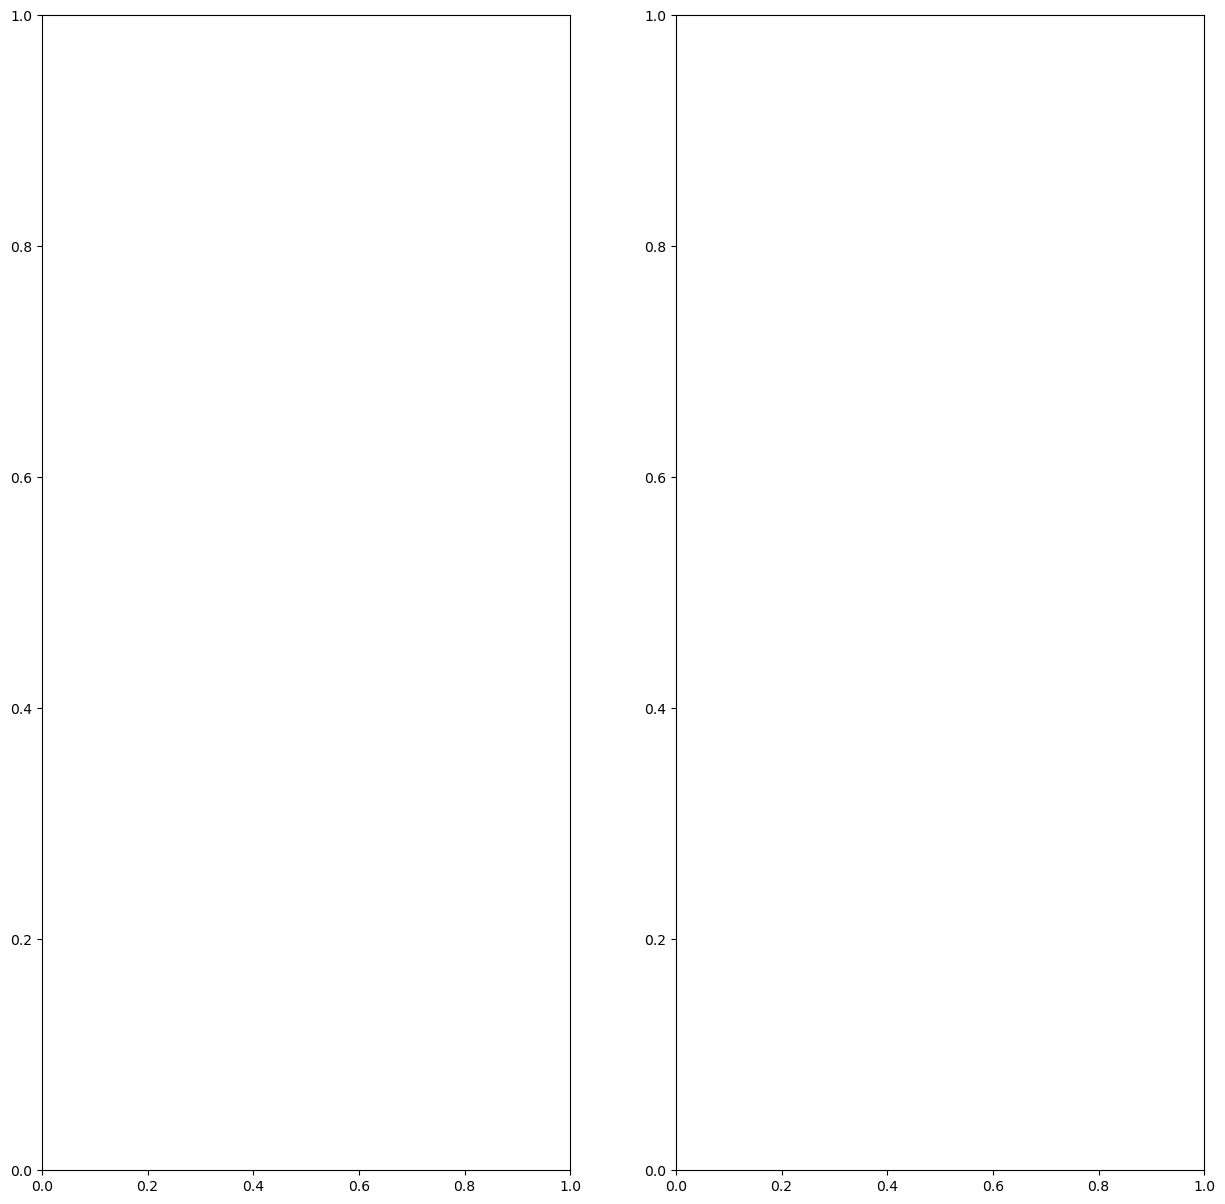

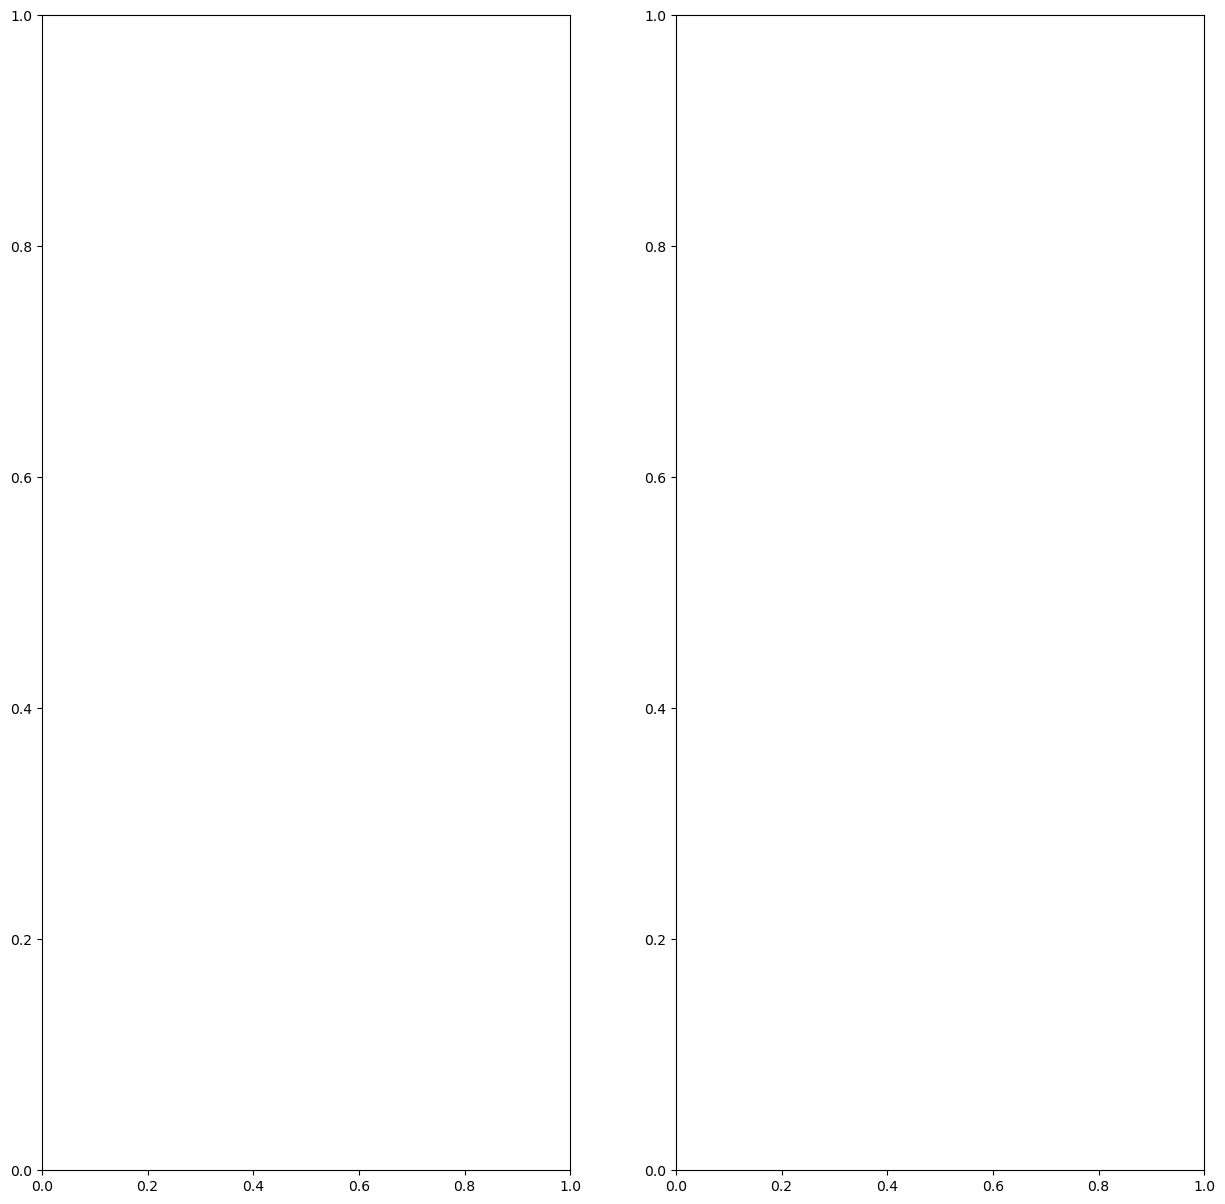

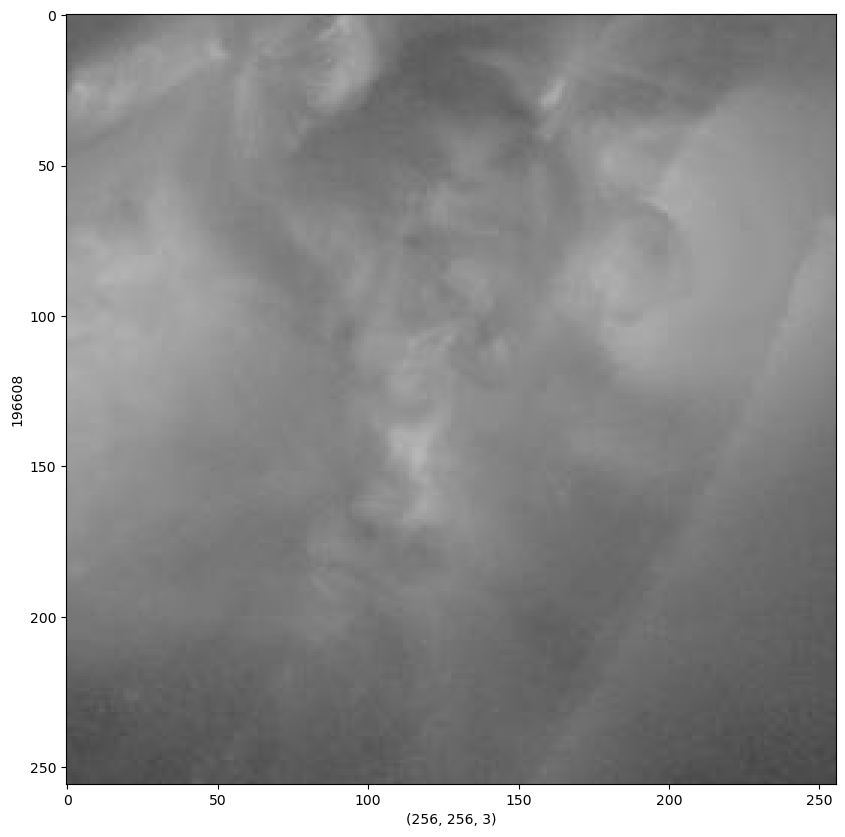

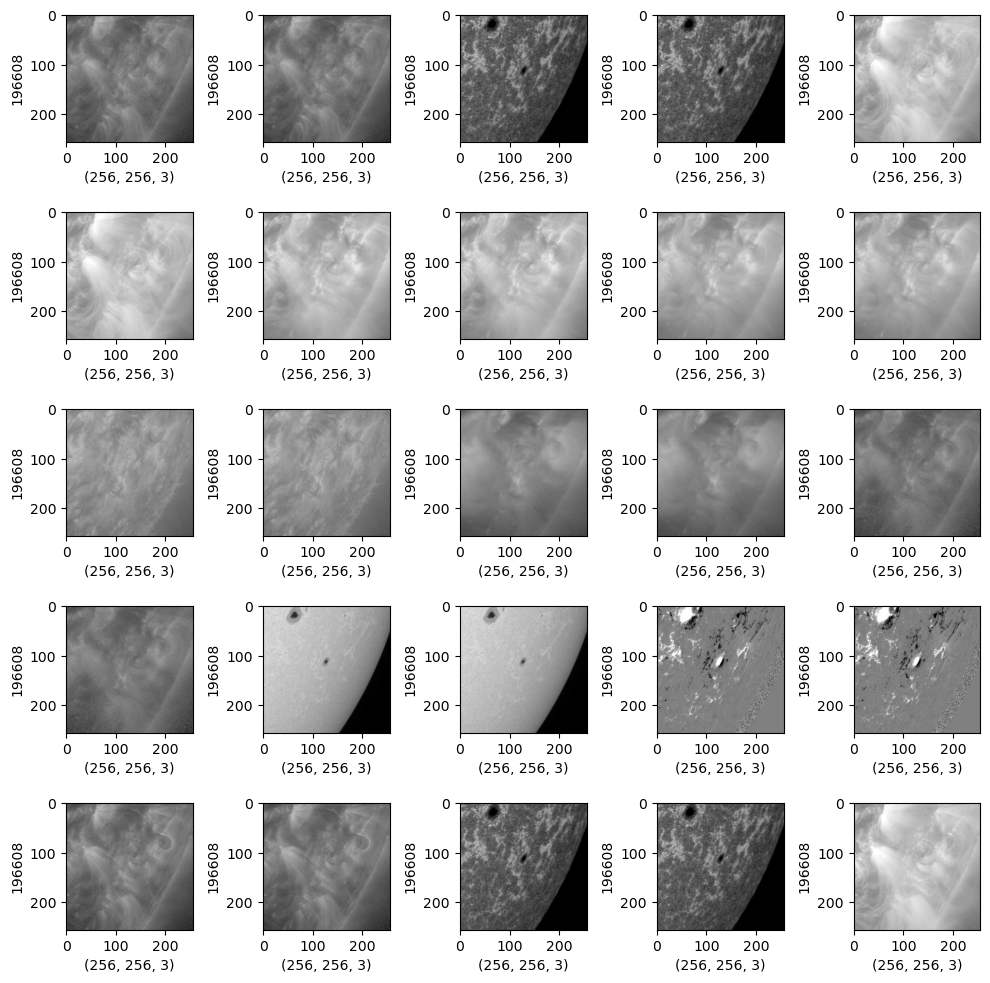

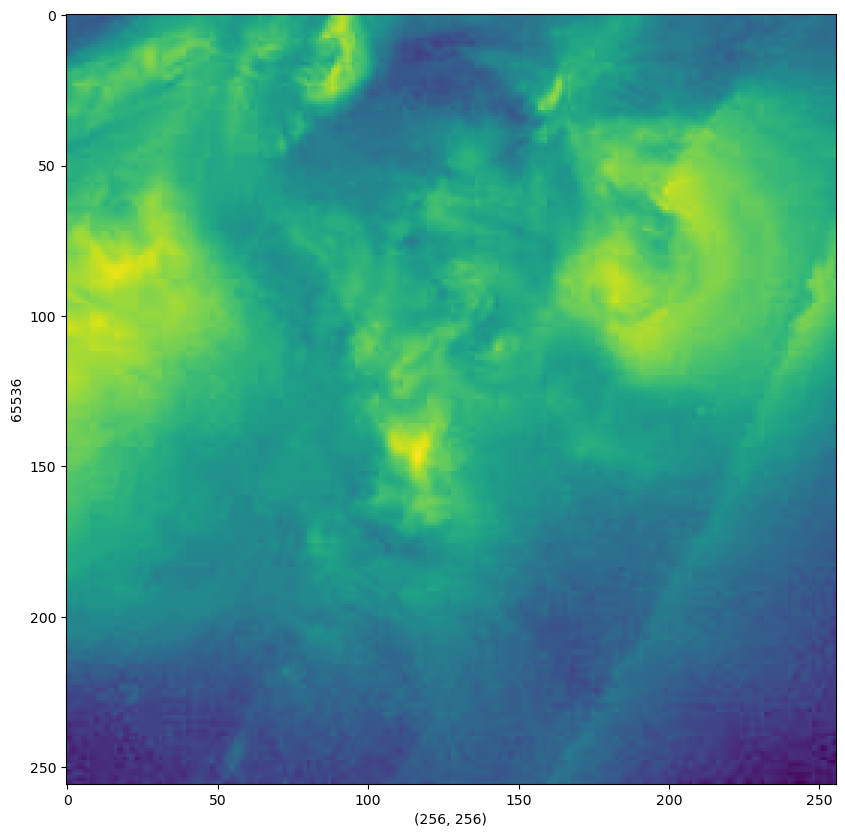

In [79]:
#2D
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]), cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Example_IMG[:,:,0].shape)
plt.ylabel(Example_IMG[:,:,0].size)
plt.imshow(Example_IMG[:,:,0])
plt.show()

Treshold image

In [80]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Threshold_IMG.shape)
plt.ylabel(Threshold_IMG.size)
plt.imshow(Threshold_IMG)
#plt.show()

Varius other image types can be used such as Layer concat, Countours, Canny-treshold concat etc.

Data transform

In [81]:
X_Start = []
X_End = []
X_Image = []

for img,start_i, end_i in zip(Main_Data.PATH.values, Main_Data.START.values, Main_Data.END.values):
    Picking_IMG = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.resize(Picking_IMG, (180,180))
    Picking_IMG = Picking_IMG / 255.

    X_Image.append(Picking_IMG)
    X_Start.append(start_i)
    X_End.append(end_i)

In [82]:
print(np.shape(np.array(X_Image)))
print(np.shape(np.array(X_Start)))
print(np.shape(np.array(X_End)))

(417, 180, 180, 3)
(417,)
(417,)


In [83]:
Train_JPG = np.array(X_Image,dtype = "float32")
Train_START = np.array(X_Start,dtype="float32")
Train_END = np.array(X_End,dtype="float32")

In [84]:
print(Train_JPG.shape)
print(Train_START.shape)
print(Train_END.shape)

(417, 180, 180, 3)
(417,)
(417,)


In [85]:
Scalar_Function = MinMaxScaler()

Train_START_R = Scalar_Function.fit_transform(Train_START.reshape(-1,1))
Train_END_R = Scalar_Function.fit_transform(Train_END.reshape(-1,1))

Auto-encoder

In [86]:
X_Mask = []
X_New_IMG = []

for img_i in Main_Data.PATH.values:
    Picking_IMG = cv2.cvtColor(cv2.imread(img_i),cv2.COLOR_BGR2RGB)
    _,Threshold_IMG = cv2.threshold(Picking_IMG,200,255,cv2.THRESH_BINARY)
    Canny_IMG = cv2.Canny(Threshold_IMG, 10,100)

    Copy_Main = Picking_IMG.copy()
    Copy_Main[Canny_IMG == 255] = [255,0,0]

    Copy_Main = cv2.resize(Copy_Main, (180,180))
    Copy_Main = Copy_Main / 255.

    Picking_IMG = cv2.resize(Picking_IMG, (180,180))
    Picking_IMG = Picking_IMG / 255.

    X_Mask.append(Copy_Main)
    X_New_IMG.append(Picking_IMG)

In [87]:
X_Mask = np.array(X_Mask,dtype="float32")
X_New_IMG = np.array(X_New_IMG,dtype="float32")

In [88]:
print(X_New_IMG.shape)
print(X_Mask.shape)

(417, 180, 180, 3)
(417, 180, 180, 3)


In [90]:
figure,axis = plt.subplots(1,2, figsize=(15,15))

axis[0].imshow(X_New_IMG[0])
axis[0].axis("off")
axis[1].imshow(X_Mask[0])
axis[1].axis("off")

(-0.5, 179.5, 179.5, -0.5)

In [94]:
figure,axis = plt.subplots(1,2, figsize=(15,15))

axis[0].imshow(X_New_IMG[100])
axis[0].axis("off")
axis[1].imshow(X_Mask[100])
axis[1].axis("off")

(-0.5, 179.5, 179.5, -0.5)

Encoder model

Parameters / Callbacks

In [98]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy", save_best_only=True, save_weights_only=True, filepath="./modelcheck")
Reduce_Model = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=0.5)

In [103]:
compile_loss = "binary_crossentropy"
compile_optimizers = Adam(lr=0.0000001)
output_class = 1

Structure

In [ ]:
E_AE = Sequential()

E_AE.add(Conv2D(32,(5,5), kernel_initializer= 'he_normal', use_bias=True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())

E_AE.add(Conv2D(64,(5,5), kernel_initializer= 'he_normal',use_bias= True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())

E_AE.add(Conv2D(128,(5,5), kernel_initializer= 'he_normal', use_bias= True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())

E_AE.add(Conv2D(256,(5,5), kernel_initializer= 'he_normal', use_bias=True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())

D_AE = Sequential()

D_AE.add(Conv2DTranspose(128,(5,5), padding="valid"))
D_AE.add(ReLU)

Training